fff

Importamos las librerias necesarias

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from math import factorial

In [29]:
X = np.arange(1, 11)  
y = np.array([factorial(n) for n in X])

print("X:", X)
print("y:", y)

y_norm = y / np.max(y)

X: [ 1  2  3  4  5  6  7  8  9 10]
y: [      1       2       6      24     120     720    5040   40320  362880
 3628800]


In [30]:
model = keras.Sequential([
    layers.Dense(32, activation="relu", input_shape=(1,)),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="linear")
])

model.compile(optimizer="adam", loss="mse")


c:\Users\Estudiante\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
history = model.fit(X, y_norm, epochs=500, verbose=0)

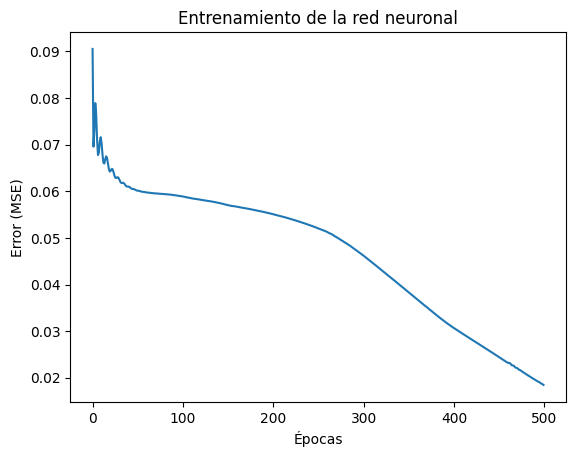

In [32]:
plt.plot(history.history['loss'])
plt.xlabel("Épocas")
plt.ylabel("Error (MSE)")
plt.title("Entrenamiento de la red neuronal")
plt.show()

Entrenamiento del modelo

In [33]:
predicciones = model.predict(X).flatten() * np.max(y)

print("Número | Factorial real | Predicho")
for i in range(len(X)):
    print(f"{X[i]:7d} | {y[i]:14d} | {predicciones[i]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Número | Factorial real | Predicho
      1 |              1 | 7668.90
      2 |              2 | -16543.84
      3 |              6 | -28693.37
      4 |             24 | -40843.21
      5 |            120 | -52993.49
      6 |            720 | -38411.32
      7 |           5040 | 59694.26
      8 |          40320 | 264993.51
      9 |         362880 | 1366067.82
     10 |        3628800 | 2467139.76


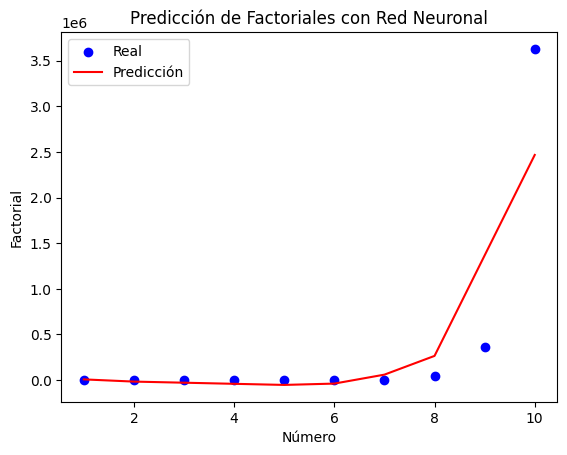

In [34]:
plt.scatter(X, y, color="blue", label="Real")
plt.plot(X, predicciones, color="red", label="Predicción")
plt.xlabel("Número")
plt.ylabel("Factorial")
plt.title("Predicción de Factoriales con Red Neuronal")
plt.legend()
plt.show()